In [32]:
import gym

import onnxruntime
import numpy as np
import matplotlib.pyplot as plt

from itertools import count
import time

from IPython import display

In [33]:
def plot(episode_durations: list[int], title: str):
    plt.figure(1)
    plt.clf()
    plt.title(title)
    plt.xlabel('episodes')
    plt.ylabel('duration')
    plt.plot(episode_durations)
    plt.pause(.001)
    display.clear_output(wait=True)

In [34]:
num_episodes = 1000

models_path = 'onnx'
model_appendix = '_%d' % num_episodes
model_format = '.onnx'
policy_net_path = models_path + '/cart_pole_tf_1_policy_net' + model_appendix + model_format
target_net_path = models_path + '/cart_pole_tf_1_target_net' + model_appendix + model_format

In [35]:
policy_net = onnxruntime.InferenceSession(policy_net_path)
input_name = policy_net.get_inputs()[0].name
# target_net = onnxruntime.InferenceSession(target_net_path)

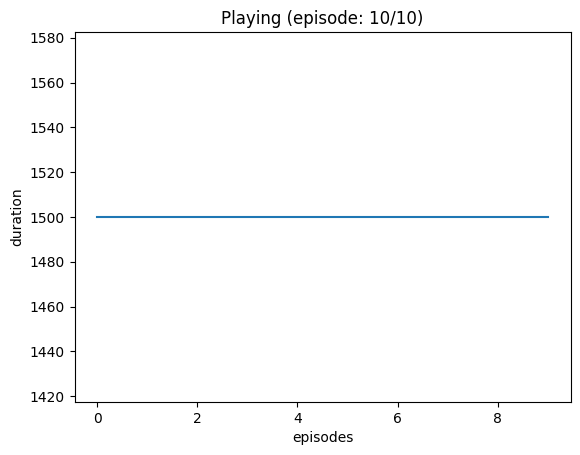

In [36]:
env = gym.make('CartPole-v1', render_mode='human')
episode_durations = list()

episodes_to_play = 10
timestep_limit = 1500

for episode in range(episodes_to_play):
    state, observation = env.reset()
    done = False
    # time.sleep(1)
    for timestep in count():
        env.render()
        
        state_input = np.array([state], dtype=np.float32)
        outputs = policy_net.run(None, { input_name: state_input })
        action = np.argmax(outputs[0], axis=1)[0]
        next_state, reward, done, truncated, info = env.step(action)

        done = done if timestep < timestep_limit else True
        state = next_state

        if done:
            episode_durations.append(timestep)
            plot(episode_durations, title=f'Playing (episode: {episode + 1}/{episodes_to_play})')
            break

In [37]:
env.close()